In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
from universe import *
# import seaborn as sns
from utils import *
from fisher import *
from profiles import*
from halo import HaloModel
from kernels import LensCMB
from limber import Limber

%load_ext line_profiler


## Setting up cosmology, mass function and pressure profile

In [3]:
cosmo = Cosmo()
mf = MassFunction(cosmo)
ep = ClusterElectronicPressure(cosmo)
lens = ClusterLensing(cosmo, hmf=mf)

## Calculate tSZ x CMB lensing power spectrum

In [4]:
ell_array = np.round(np.logspace(np.log10(2),np.log10(5e3),25))

In [5]:
hm = HaloModel(cosmo, mf, lrange=ell_array, npts=50)

In [6]:
cl1h_yp = hm.GetCl1Halo(ep.y_ell, lens.phi_ell)
cl2h_yp = hm.GetCl2Halo(ep.y_ell, k2=lens.phi_ell)


2.0
3.0
4.0
5.0
7.0
10.0
14.0
20.0
27.0
38.0
52.0
72.0
100.0
139.0
192.0
266.0
368.0
510.0
707.0
980.0
1357.0
1880.0
2605.0
3609.0
5000.0


# Compare this to Hill&Spergel

Text(0,0.5,u'$\\mathcal{D}_{\\ell}^{y\\phi}$')

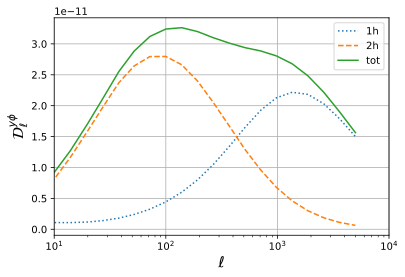

In [13]:
plt.plot(ell_array, ell_array**2*(ell_array+1)*cl1h_yp/2/np.pi, ':', label=r'1h')
plt.plot(ell_array, ell_array**2*(ell_array+1)*cl2h_yp/2/np.pi, '--', label=r'2h')
plt.plot(ell_array, ell_array**2*(ell_array+1)*(cl2h_yp+cl1h_yp)/2/np.pi, '-', label=r'tot')
plt.xlim([10,10000])
plt.xscale('log')
# plt.yscale('log')
# plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$\mathcal{D}_{\ell}^{y\phi}$',size=15)


# Compare this to Battaglia,Hill&Murray

Text(0,0.5,u'$\\ell^2(\\ell+1)C_{\\ell}^{y\\phi}/2\\pi$')

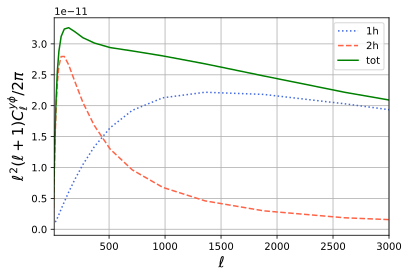

In [14]:
plt.plot(ell_array, ell_array**2*(ell_array+1)*cl1h_yp/2/np.pi, ':', color='royalblue', label=r'1h')
plt.plot(ell_array, ell_array**2*(ell_array+1)*cl2h_yp/2/np.pi, '--', color='tomato', label=r'2h')
plt.plot(ell_array, ell_array**2*(ell_array+1)*(cl2h_yp+cl1h_yp)/2/np.pi, '-', color='green', label=r'tot')
plt.xlim([10,3000])
# plt.xscale('log')
# plt.yscale('log')
# plt.ylim([1e-18,1e-9])
plt.grid()
plt.legend(loc='best')
plt.xlabel(r'$\ell$',size=15)
plt.ylabel(r'$\ell^2(\ell+1)C_{\ell}^{y\phi}/2\pi$',size=15)
